#

In [3]:
import numpy as np

In [5]:
# Review

# We have the quad function for numerical integration.
# - quad means for quadrature = numerical integration.
# - this function is coming from scipy.integrate

```python
from scipy.integrate import quad

help(quad)
```

# `quad(func, a, b)`

Compute a definite integral. 

Integrate func from `a` to `b` using a
techniqu

----


Parameters
----------
- **func** : {callable, scipy.LowLevelCallable}

    A Python function or method to integrate (must accept vector inputs).
    
- **a** : float
    Lower limit of integration (use -scipy.inf for -infinity).
- **b** : float
    Upper limit of integration (use scipy.inf for +infinity).
- args : tuple, optional
    Extra arguments to pass to function, if any.
- full_output : bool, optional
    If True, return optional outputs.
- epsabs : float, optional
    Absolute error tolerance.
- epsrel : float, optional
    Relative error tolerance.
- limit : int, optional
    Maximum number of subdivisions (if positive).
- points : array_like, optional
    A sequence of break points in the bounded integration interval
    where local difficulties of the integrand may occur (e.g.,
    singularities, discontinuities).  The sequence does not have to be
    sorted.
- weight : array_like, optional
    Weights corresponding to points.  These must be positive, with the
    same shape as points.  If None (default), the default weight
    1 is used.

In [6]:
# \int_{0}^{\frac{1}{10}} x^2\ dx = \frac{1}{300}

In [7]:
from scipy.integrate import quad

enforcer_cop_99284749 = lambda f,k: quad(f, 0, k)[0]

from scipy.optimize import fsolve

fsolve(lambda x: enforcer_cop_99284749(lambda t: t**2, x) - 10, 999)

array([3.10723251])

In [8]:
# \int_{0}^{3.10723251} x^2\ dx = \frac{10}{1}

In [9]:
import scipy

for thing in dir(scipy.integrate):
    if thing[0] != '_':
        print(thing)

AccuracyWarning
BDF
DOP853
DenseOutput
IntegrationWarning
LSODA
OdeSolution
OdeSolver
RK23
RK45
Radau
complex_ode
cumtrapz
cumulative_trapezoid
dblquad
dop
fixed_quad
lsoda
newton_cotes
nquad
ode
odeint
odepack
qmc_quad
quad
quad_vec
quadpack
quadrature
romb
romberg
simps
simpson
solve_bvp
solve_ivp
test
tplquad
trapezoid
trapz
vode


## SciPy Integration and ODE Solvers

SciPy offers a wide range of integration methods to handle different types of problems, from simple integrals to complex differential equations. 

Choosing the right method depends on the specifics of the problem at hand.

### Definite Integrals of Functions

- `quad`: Use for single variable definite integrals over a finite interval.
- `dblquad`, `tplquad`, `nquad`: Use these for double, triple, and N-dimensional integrals.

### Gaussian Quadrature

- `fixed_quad`: Use for integrating polynomials over a fixed interval.
- `quadrature`: Use for adaptive Gaussian quadrature, especially for oscillatory integrals.

### Simpson's and Trapezoidal Rules

- `simps`, `simpson`: Use Simpson's rule for smooth functions where data points are available.
- `cumtrapz`, `cumulative_trapezoid`: Use for cumulative integration of discrete data points using the trapezoidal rule.

### Ordinary Differential Equations (ODEs)

- `odeint`: A general-purpose integrator using LSODA (Adams/BDF method).
- `solve_ivp`: A modern interface for initial value problems in ODEs, providing access to a variety of methods.

### ODE Solver Methods

- `RK23`, `RK45`: Explicit Runge-Kutta methods of different orders, suitable for non-stiff problems.
- `Radau`, `BDF`: Implicit methods, used for stiff problems.
- `LSODA`: Can switch between methods depending on the problem's stiffness.

### Boundary Value Problems

- `solve_bvp`: For solving boundary-value problems, useful when conditions at both ends of the interval are known.

In [10]:
# let us try to get dbl, tpl, and n quad functions working.

from scipy.integrate import dblquad, tplquad, nquad

dblquad(lambda x, y: x**2 + y**2, -1, 1, -1, 1)

(2.6666666666666665, 2.9605947323337504e-14)

$$
\begin{align*}
& \int_{R} x^2 + y^2 dA\\
=& \int_{-1}^1 \frac{x^3}{3} + xy^2 \bigg|_{-1}^1 dy\\
=& \frac{4}{3} + \frac{4}{3}
\end{align*}
$$

In [11]:
4/3+4/3

2.6666666666666665

In [12]:
# vline in latex for eval expression is \bigg|_{a}^{s}

In [14]:
R = 1
n = 3

limits = [(0, R)] * n

def integrand(*args):
    return 1 if sum(x**2 for x in args) <= R**2 else 0

# nquad(integrand, limits) # this is taking too long

In [15]:
from sympy import simplify, Matrix, symbols, diff, lambdify, sin, cos, init_printing
init_printing()

# use jacobian for spherical coords and compute the differential volume at a point x,y,z

rho, theta, phi = symbols('rho theta phi')

x = rho * sin(phi) * cos(theta)
y = rho * sin(phi) * sin(theta)
z = rho * cos(phi)

D = Matrix([x, y, z]).jacobian([rho, phi, theta])

simplify(D.det())

In [16]:
d_area = lambdify((rho, phi, theta), D.det())

In [17]:
d_area(1, np.pi/2, 0), d_area(1, np.pi/2 + 0.01, 0), d_area(2, np.pi/2, np.pi/2)

In [5]:
# this code should compute the volume of a sphere of radius 1,
# however, i dont think it is working since 122 is not closeto 4/3 pi

from itertools import product
mesh = np.linspace(-1, 1, 40)

diff = mesh[1] - mesh[0]

vol = 0
for x,y,z in product(mesh, repeat=3):
    if x**2 + y**2 + z**2 <= 1:
        vol += diff**3

In [6]:
vol

4.177548508912778

In [7]:
4*np.pi/3

4.1887902047863905

In [12]:
def vol(n, npts=10):

    mesh = np.linspace(-1, 1, npts)
    diff = mesh[1] - mesh[0]
    vol =0 
    
    for x in product(mesh, repeat=n):
        if sum(t**2 for t in x) <= 1:
            vol += diff**n
            
    return vol

In [13]:
vol(4, 10), vol(5, 10),vol(6, 10) 

(4.68221307727464, 5.150434385002508, 5.2949471343004815)

In [13]:
vol(6, npts=15) 

5.271188025389102

In [14]:
np.pi**2/2, np.pi**2*8/15, np.pi**3/6

(4.934802200544679, 5.263789013914324, 5.167712780049969)

In [11]:
vol(3, 40)

4.177548508912778

In [49]:
vol(2, 1000)

In [55]:
vol(1, 1000)

dimension: 1
dimension: 2
dimension: 3
dimension: 4
dimension: 5
dimension: 6
dimension: 7
dimension: 8
dimension: 9


KeyboardInterrupt: 

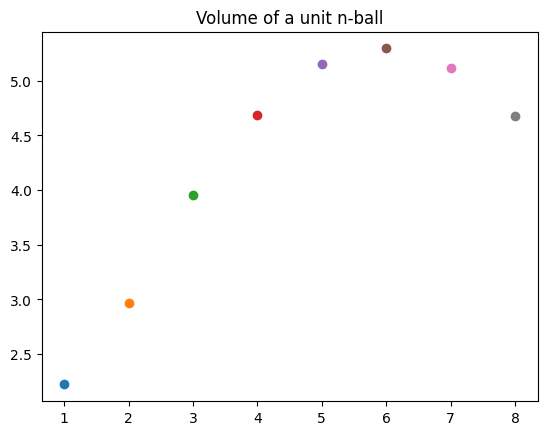

In [14]:
from matplotlib.pyplot import plot, show, xlabel, ylabel, title, legend

title('Volume of a unit n-ball')
for dim in range(1, 10):
    print("dimension:", dim)
    plot(dim, vol(dim, 10), 'o')
xlabel('Dimension')
ylabel('Volume')

# Exercies

Compute the area bounded by the level curve $y^3-y+x^2=0.3$.

In [19]:
(5/4)**(1/4)

1.057371263440564

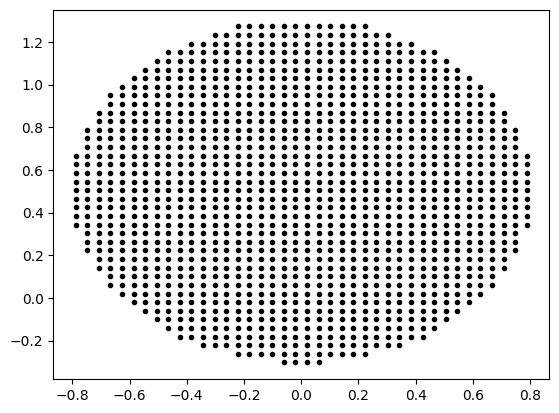

In [42]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

xs = np.linspace(-2,2,100)
ys = np.linspace(-2,2,100)

def F(x, y, tol=0.1):
    return y**2-y+x**2-0.3 <= tol

for x,y in product(xs, ys):
    if F(x,y):
        plt.plot(x,y,".k")

In [45]:
import sympy as sp

sp.init_printing()

x, y = sp.symbols('x y', real=True)

In [46]:
level_curve = sp.Eq(y**2-y+x**2, 0.3)

level_curve

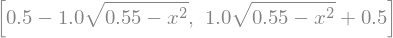

In [47]:
funcs = []
for sol in sp.solve(level_curve, y):
    funcs.append(sol)

funcs

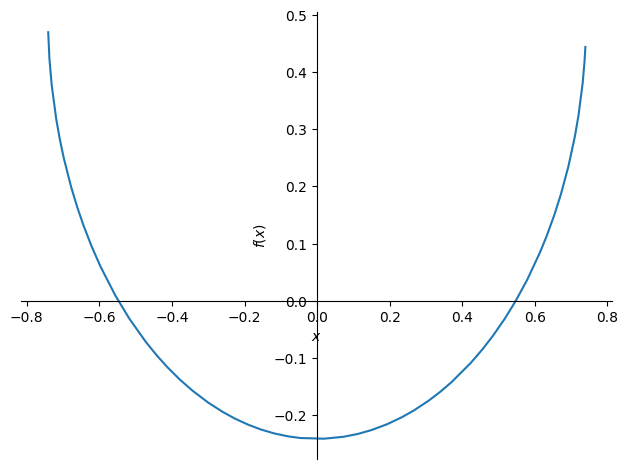

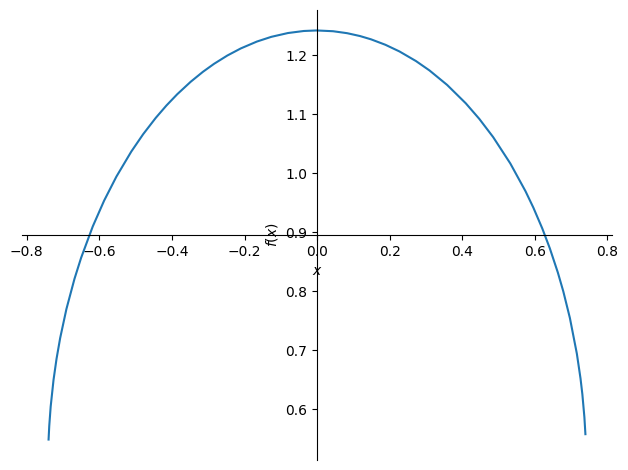

In [50]:
for func in funcs:
    sp.plot(func, (x,-10,10))

In [52]:
r1, r2 = sp.solve(funcs[0]-funcs[1], x)
r1, r2

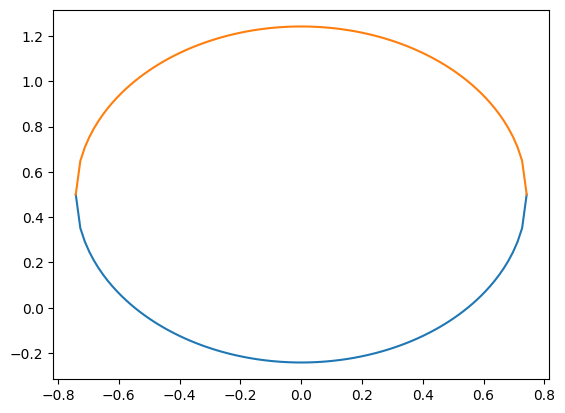

In [53]:
plt.figure()
# plt.axvline(r1)
# plt.axvline(r2)
xs = np.linspace(float(r1), float(r2), 100)
for func in funcs:
    f = sp.lambdify(x, func)
    plt.plot(xs, f(xs))

In [54]:
float(sp.integrate(funcs[1]-funcs[0], (x, r1, r2)))

In [55]:
from scipy.integrate import quad

abs(quad(sp.lambdify(x, funcs[1]), r1, r2)[0]) + abs(quad(sp.lambdify(x, funcs[0]), r1, r2)[0])

In [56]:
from scipy.integrate import dblquad

dblquad(lambda x,y: 1, r1, r2, sp.lambdify(x, funcs[0]), sp.lambdify(x, funcs[1]))[0]

In [3]:
from sympy.abc import t
from sympy import integrate

integrate(t**2, (t, 0, 3.10723251))

10.0000000390651